# Data Preprocessing Feature Encoding 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preprocessing-Feature-Encoding" data-toc-modified-id="Data-Preprocessing-Feature-Encoding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing Feature Encoding</a></span><ul class="toc-item"><li><span><a href="#Used-Libraries" data-toc-modified-id="Used-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Used Libraries</a></span></li></ul></li><li><span><a href="#Label-Encoding-or-Ordinal-Encoding" data-toc-modified-id="Label-Encoding-or-Ordinal-Encoding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Label Encoding or Ordinal Encoding</a></span></li><li><span><a href="#One-hot-Encoding-and-Dummy-Encoding" data-toc-modified-id="One-hot-Encoding-and-Dummy-Encoding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>One hot Encoding and Dummy Encoding</a></span></li><li><span><a href="#Frequency-Encoding" data-toc-modified-id="Frequency-Encoding-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Frequency Encoding</a></span></li><li><span><a href="#Count-Encoding" data-toc-modified-id="Count-Encoding-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Count Encoding</a></span></li><li><span><a href="#Effect-Encoding" data-toc-modified-id="Effect-Encoding-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Effect Encoding</a></span></li><li><span><a href="#Hash-Encoder" data-toc-modified-id="Hash-Encoder-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Hash Encoder</a></span></li><li><span><a href="#Base-N-Encoding" data-toc-modified-id="Base-N-Encoding-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Base N Encoding</a></span></li><li><span><a href="#Binary-Encoding" data-toc-modified-id="Binary-Encoding-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Binary Encoding</a></span></li><li><span><a href="#Target--Encoding" data-toc-modified-id="Target--Encoding-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Target  Encoding</a></span></li><li><span><a href="#Weight-of-Evidence-Encoding-(WOE)" data-toc-modified-id="Weight-of-Evidence-Encoding-(WOE)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Weight of Evidence Encoding (WOE)</a></span></li><li><span><a href="#Probability-Ratio-Encoding" data-toc-modified-id="Probability-Ratio-Encoding-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Probability Ratio Encoding</a></span></li><li><span><a href="#Continuous-Data-To-Intervals" data-toc-modified-id="Continuous-Data-To-Intervals-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Continuous Data To Intervals</a></span></li><li><span><a href="#CatBoost-Encoder" data-toc-modified-id="CatBoost-Encoder-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>CatBoost Encoder</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Resources</a></span></li></ul></div>

## Used Libraries
* sklearn preprocessing :The sklearn module for data preprocessing includes Encoding, scaling, centering, normalization, binarization methods 
[sklearn preprocessing docs](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).
* Category Encoders:A set of scikit-learn-style transformers for encoding categorical variables into numeric with different techniques . based on sklearn and pandes and has some enhancement in encoding.
[Category Encoders docs](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).
* pandas 


In [1]:
#to install category_encoders un comment next line
#!pip install category_encoders

In [2]:
from warnings import simplefilter
simplefilter('ignore')

import pandas as pd
import category_encoders as ce
from sklearn import preprocessing
import numpy as np

# Label Encoding or Ordinal Encoding
use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.

* **sklearn LabelEncoder** : Encode target labels with value between 0 and n_classes-1
* **sklearn LabelEncoder** : Encode target labels with value between 0 and n_classes-1
* **pandas use map**: to assign value for each category 

**Advantages :**

* Can work well enough with tree-based algorithms.
* Does not expand the feature space.

**Limitations:**

* Creates an order relationship between the categories.

In [3]:
Degrees =pd.DataFrame({'Degree':['Masters','Bachelors','Bachelors','Masters','Phd','High school']})
mapper = {"Masters":3, "Bachelors":1, "Phd":4,"High school":0}
Degrees['encoding']= Degrees['Degree'].map(mapper)
Degrees

,Degree,encoding
0,Masters,3
1,Bachelors,1
2,Bachelors,1
3,Masters,3
4,Phd,4
5,High school,0


In [4]:
Degrees =pd.DataFrame({'Degree':['Masters','Bachelors','Bachelors','Masters','Phd','High school']})
oece = ce.OrdinalEncoder(cols=['Degree'],return_df=True,
                           mapping=[{'col':'Degree','mapping':mapper}])
Degrees['encoding']= oece.fit_transform(Degrees)
Degrees

,Degree,encoding
0,Masters,3
1,Bachelors,1
2,Bachelors,1
3,Masters,3
4,Phd,4
5,High school,0


In [5]:
oe = preprocessing.OrdinalEncoder()
Degrees['encoding']=  oe.fit_transform(Degrees['Degree'].values.reshape(-1, 1))
Degrees

,Degree,encoding
0,Masters,2.0
1,Bachelors,0.0
2,Bachelors,0.0
3,Masters,2.0
4,Phd,3.0
5,High school,1.0


In [6]:
le = preprocessing.LabelEncoder()
Degrees['encoding']=  le.fit_transform(Degrees['Degree'].values)
Degrees

,Degree,encoding
0,Masters,2
1,Bachelors,0
2,Bachelors,0
3,Masters,2
4,Phd,3
5,High school,1


# One hot Encoding and Dummy Encoding
when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature.

Dummy coding scheme is similar to one-hot encoding both transforms the categorical variable into a set of binary variables In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.
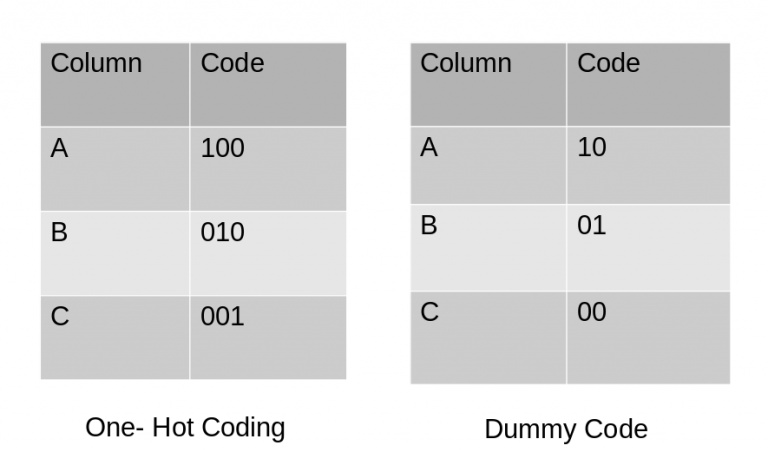

* **pd get_dummies:** Encode categorical features as a one-hot numeric array and use `drop_first=True` to drop one category.
* **sklearn OneHotEncoder:** Encode categorical features as a one-hot numeric array.


**Limitations:**

* A large number of levels are present in data. If there are multiple categories in a feature variable in such a case we need a similar number of dummy variables to encode the data. 
* Does not add extra information while encoding.
* low variability of rare categories features.


In [7]:
caps =pd.DataFrame({'Capital':["Moscow","Cairo","Cairo","Cairo", "Cairo", "amsterdam",'Moscow',"Rome",
                               "London","London","Cairo","Rome","Rome","London"]})
ohe = preprocessing.OneHotEncoder(sparse =False)
ohe.fit(caps['Capital'].values.reshape(-1, 1))
names = list('Captial_'+ohe.categories_[0])
pd.DataFrame( ohe.transform(
                        caps['Capital'].values.reshape(-1, 1) 
            ) ,columns=names ).head()

,Captial_Cairo,Captial_London,Captial_Moscow,Captial_Rome,Captial_amsterdam
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [8]:
encoder=ce.OneHotEncoder(cols='Capital',return_df=True,use_cat_names=True)
encoder.fit_transform(caps).head()

,Capital_Moscow,Capital_Cairo,Capital_amsterdam,Capital_Rome,Capital_London
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [9]:
pd.get_dummies(caps,columns=['Capital'],drop_first=True).head()

,Capital_London,Capital_Moscow,Capital_Rome,Capital_amsterdam
0,0,1,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


# Frequency Encoding
each category encoded with it's Frequency. 


In [10]:
caps =pd.DataFrame({'Capital':["Moscow","Cairo", "amsterdam",'Moscow',"Rome","London","Cairo","Cairo", "Cairo",
                               "London","London","Cairo","Rome","Rome"]})
gr = caps.groupby("Capital").size().div(caps.shape[0])

display(gr)
caps['enc']=caps["Capital"].map(gr)
caps.head(6)

Capital
Cairo        0.357143
London       0.214286
Moscow       0.142857
Rome         0.214286
amsterdam    0.071429
dtype: float64

,Capital,enc
0,Moscow,0.142857
1,Cairo,0.357143
2,amsterdam,0.071429
3,Moscow,0.142857
4,Rome,0.214286
5,London,0.214286


# Count Encoding
For a given categorical feature, replace the names of the groups with the group counts.
* **pandas:** use group by and same as freq Encode
* **Count Encoder:** in category_encoders

In [11]:
caps =pd.DataFrame({'Capital':["Moscow","Cairo", "amsterdam",'Moscow',"Rome","London","Cairo","Cairo", "Cairo",
                               "London","London","Cairo","Rome","Rome",np.nan,np.nan,np.nan]})
cer= ce.count.CountEncoder(cols='Capital',return_df=True,min_group_size=1, combine_min_nan_groups =True)
caps['enc'] = cer.fit_transform(caps)
caps

,Capital,enc
0,Moscow,2
1,Cairo,5
2,amsterdam,1
3,Moscow,2
4,Rome,3
5,London,3
6,Cairo,5
7,Cairo,5
8,Cairo,5
9,London,3


# Effect Encoding
This encoding technique is also known as **Deviation Encoding** or **Sum Encoding**.

Effect encoding is almost similar to **dummy encoding**, with a little difference: 
* dummy coding, we use 0 and 1 to represent the data.
* effect encoding, use three values i.e. 1,0, and -1.

In [12]:
caps =pd.DataFrame({'Capital':["paris","tokyo","Cairo","Cairo", "amsterdam", "amsterdam",'Moscow',"Rome",
                               " London ","Lisbon"," Canberra ","Amman"," Alofi","Algiers"]})
ee= ce.sum_coding.SumEncoder(cols='Capital',return_df=True)
ee.fit_transform(caps)

,intercept,Capital_0,Capital_1,Capital_2,Capital_3,Capital_4,Capital_5,Capital_6,Capital_7,Capital_8,Capital_9,Capital_10
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Hash Encoder
Hashing is the transformation of arbitrary size input in the form of a fixed-size value.

Hash encoder like one-hot encoding for n categories return n columns but can use n_components to adjust the number of columns.
but when reduce the data to lower dimensions we may loss important information.

In [13]:
caps =pd.DataFrame({'Capital':["paris","tokyo","Cairo","Cairo", "amsterdam", "amsterdam",'Moscow',"Rome",
                               "London","Lisbon","Canberra","Amman","Alofi","Algiers"]})
he= ce.HashingEncoder(cols='Capital',return_df=True,n_components=4)
he.fit_transform(caps)

,col_0,col_1,col_2,col_3
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,0,1,0,0
8,0,0,0,1
9,0,0,0,1


# Base N Encoding
- [Base N at wiki](https://en.wikipedia.org/wiki/Radix)
Encode categorical variables with selected Base N system up to 8 as we cant use base 16 as it use alpha-numeric. 

In [14]:
caps =pd.DataFrame({'Capital':["paris","tokyo","Cairo","Cairo", "amsterdam", "amsterdam",'Moscow',"Rome",
                               " London ","Lisbon"," Canberra ","Amman"," Alofi","Algiers"]})
bne = ce.BaseNEncoder(cols=['Capital'],return_df=True,base=4)
bne.fit_transform(caps)

,Capital_0,Capital_1,Capital_2
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,3
4,0,1,0
5,0,1,0
6,0,1,1
7,0,1,2
8,0,1,3
9,0,2,0


# Binary Encoding

**Binary encoding** or (Base 2 Encoder) for categorical variables, similar to **onehot**, but stores categories as binary bitstrings.

Binary encoding is a memory-efficient encoding than one-hot encoding as it use Binary representation for n categories
Then binary encoding results in the only log base 2 of n features, which is = ln(n) / ln(2).

**Advantages:**
* Does not expand the feature space too much.
**Limitations:**
* It exposes the loss of information during encoding.
* It not the human readable.

In [15]:
be= ce.BinaryEncoder(cols='Capital',return_df=True)
be.fit_transform(caps)

,Capital_0,Capital_1,Capital_2,Capital_3,Capital_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,0,1,1
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,1,0,1
7,0,0,1,1,0
8,0,0,1,1,1
9,0,1,0,0,0


# Target  Encoding

In target encoding, calculate the mean(or any statistic eg. median ,mode ) of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables, the posterior probability of the target replaces each category

**Target Encoder in category encoders:** encode categorical variables with the mean value of the target.

**Advantages :**
* Creates a relationship between categories and the target (Add extra information).

**Limitations:**
* May lead to overfitting
* May lead to a possible loss of value if two categories have the same statistic

**Leave One Out Encoder** in category encoders same as target Encoder but excludes the current row target when calculating the mean target for a level to reduce the effect of outliers.

In [16]:
caps =pd.DataFrame({'Capital':["paris","tokyo","Cairo","Cairo", "amsterdam", "amsterdam",'Moscow',"Rome",
                               "London","London","tokyo","Amman","Rome","Algiers"],
                    'y':[10,20,30,50, 10, 20,30,40,
                               60,10,15,30,20,30]
                   })
te =ce.TargetEncoder(cols='Capital',smoothing = 0) #  smoothing effect to balance categorical average vs prior. Higher value means stronger regularization. 
caps["enc"]=te.fit_transform(caps['Capital'],caps['y'],return_df=True)
caps

,Capital,y,enc
0,paris,10,26.785714
1,tokyo,20,17.500000
2,Cairo,30,40.000000
3,Cairo,50,40.000000
4,amsterdam,10,15.000000
5,amsterdam,20,15.000000
6,Moscow,30,26.785714
7,Rome,40,30.000000
8,London,60,35.000000
9,London,10,35.000000


# Weight of Evidence Encoding (WOE)

**analyticsvidhya.com**  Article by**KRUTHIKA_K**: [Understand Weight of Evidence and Information Value!](https://www.analyticsvidhya.com/blog/2021/06/understand-weight-of-evidence-and-information-value/)

Weight of evidence (WOE) is a technique used to encode categorical variables for classification.

WOE is the natural logarithm (ln) of the probability that the target equals 1 divided by the probability of the target equals 0 for each category.

**Advantages:**
* Creates a monotonic relationship between the target and the variables.
* Orders the categories on a “logistic” scale, which is natural for logistic regression.
* We can compare the transformed variables because they are on the same scale. Therefore, it’s possible to determine which one is more predictive.

**Limitations:**
* May lead to **overfitting**.
* Not defined when the denominator is 0 (category_encoders handle it using regularization parameter)

In [17]:
caps =pd.DataFrame({'Capital':["A","A","A","c", "c", "c",'c',
                               "B","B","B","B","D","D"],
                    'y':[1,1,1,1,0,1,1,
                               1,0,1,0,0,0]
                   })
woe =ce.woe.WOEEncoder(cols='Capital',randomized = False,regularization= 0.0001) 
caps["enc"]=woe.fit_transform(caps['Capital'],caps['y'],return_df=True)
caps

,Capital,y,enc
0,A,1,9.838997
1,A,1,9.838997
2,A,1,9.838997
3,c,1,0.628557
4,c,0,0.628557
5,c,1,0.628557
6,c,1,0.628557
7,B,1,-0.469989
8,B,0,-0.469989
9,B,1,-0.469989


# Probability Ratio Encoding
This encoding is suitable for classification problems only, where the target is binary.
It’s similar to WOE, but we don’t apply the natural log (ln) just p(1)/p(0) for each category.

**Advantages** and **Limitations** same as woe

In [18]:
caps =pd.DataFrame({'Capital':["A","A","A","A","B","B"],
                    'y':[1,0,0,0,0,1]})

g1 =caps.groupby(['Capital']).size()
display(g1)
g2 = caps.groupby(['Capital','y'],as_index=False).size()
g2['size'] = g2['size'] /np.repeat( g1.values,2)
display(g2)


Capital
A    4
B    2
dtype: int64

,Capital,y,size
0,A,0,0.75
1,A,1,0.25
2,B,0,0.50
3,B,1,0.50


instead of write code divide each p(1)/p(0) we and map each category will use woe and inverse the log transformation. 
and also can handle dividing by zero

In [19]:
woe =ce.woe.WOEEncoder(cols='Capital',randomized = False,regularization= 0)
caps["enc"] = np.expm1(woe.fit_transform(caps['Capital'],caps['y'],return_df=True))
caps

,Capital,y,enc
0,A,1,-0.333333
1,A,0,-0.333333
2,A,0,-0.333333
3,A,0,-0.333333
4,B,0,1.000000
5,B,1,1.000000


# Continuous Data To Intervals
Bin continuous data into intervals using KBinsDiscretizer from sklearn      



In [20]:
KBD = preprocessing.KBinsDiscretizer(n_bins=3)

x = np.random.randint(0,10,(20,1))
np.hstack((x,KBD.fit_transform(x).toarray()))

array([[3., 1., 0., 0.],
       [8., 0., 0., 1.],
       [4., 0., 1., 0.],
       [4., 0., 1., 0.],
       [8., 0., 0., 1.],
       [9., 0., 0., 1.],
       [3., 1., 0., 0.],
       [2., 1., 0., 0.],
       [9., 0., 0., 1.],
       [6., 0., 1., 0.],
       [4., 0., 1., 0.],
       [3., 1., 0., 0.],
       [2., 1., 0., 0.],
       [5., 0., 1., 0.],
       [5., 0., 1., 0.],
       [0., 1., 0., 0.],
       [9., 0., 0., 1.],
       [9., 0., 0., 1.],
       [0., 1., 0., 0.],
       [8., 0., 0., 1.]])

# CatBoost Encoder
CatBoost is a target coding for categorical features compute each encode value as follow:
$$\large e_i =\frac{ count\_in\_class(i)+prior}{total\_count+a} $$
* **count in class:** Sum of the target for specific category.
* **prior:** the sum of the Targets for specific category divided by number of all data. 
* **total count:** category values count.
* **a:** default value 1 as in original , but in category_encoders set as parameter a for smoothing the values of encoding

In [21]:
caps =pd.DataFrame({'Capital':["paris","tokyo","Cairo","Cairo", "amsterdam", "amsterdam",'Moscow',"Rome",
                               "London","London","tokyo","Amman","Rome","Algiers"],
                    'y':[10,20,30,50, 10, 20,30,40,
                               60,10,15,30,20,30]
                   })
cbe =ce.cat_boost.CatBoostEncoder(cols='Capital',a=1) #  smoothing effect to balance categorical average vs prior. Higher value means stronger regularization. 
caps["enc"]=cbe.fit_transform(caps['Capital'],caps['y'],return_df=True)
caps


,Capital,y,enc
0,paris,10,26.785714
1,tokyo,20,26.785714
2,Cairo,30,26.785714
3,Cairo,50,28.392857
4,amsterdam,10,26.785714
5,amsterdam,20,18.392857
6,Moscow,30,26.785714
7,Rome,40,26.785714
8,London,60,26.785714
9,London,10,43.392857


# Resources

* [Category Encoders Documentation Page](https://contrib.scikit-learn.org/category_encoders/)
* [module-sklearn.preprocessing Documentation Page](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
* [catboost.ai Documentation Page for categorical features to numerical features](https://catboost.ai/docs/concepts/algorithm-main-stages_cat-to-numberic.html)

* **analyticsvidhya.com** Article by **SHIPRA SAXENA** : [Here’s All you Need to Know About Encoding Categorical Data (with Python code) ](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)

* **heartbeat.fritz.ai** Article by **Younes Charfaoui**: [Hands-on with Feature Engineering Techniques: Encoding Categorical Variables ](https://heartbeat.fritz.ai/hands-on-with-feature-engineering-techniques-encoding-categorical-variables-be4bc0715394)

* **.geeksforgeeks.org** Article by **hemavatisabu**: [Categorical Encoding with CatBoost Encoder](https://www.geeksforgeeks.org/categorical-encoding-with-catboost-encoder/)